# CMPE 482 ASSIGNMENT 2  

**Name:** Orhun Görkem  

**Student ID:** 2017400171

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Problem 1

In [29]:
v = np.array([4,-1])

### a.   
The rotation matrix M to rotate a vector $\theta$ counter clockwise is,  

$$ R = \begin{bmatrix}
\cos (\theta) & -\sin (\theta) \\
\sin (\theta) & \cos (\theta)
\end{bmatrix} $$  
So for 30 degrees rotation, R can be implemented as,

In [30]:
R = np.array([[np.cos(np.pi /6.),-1*np.sin(np.pi/6.)],[np.sin(np.pi/6.), np.cos(np.pi/6.)]])
R

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

### b.  
Suppose the incline of vector $l$ with respect to horizontal line is $\theta$.  
The projection matrix P that projects other vectors onto $l$ is like the following,  

$$ P = \frac{1}{2}.\begin{bmatrix}
1 + \cos (2\theta) & \sin (2\theta) \\
\sin (2\theta) & 1 - \cos (2\theta)
\end{bmatrix} $$ 

We want to project $v$ onto $l = [1,-1]$  
With basic geometry, we can see that $l$ is 45 degrees below the horizontal, which makes $\theta = \frac{7.\pi}{4}$

$\theta$ is in radians.

In [31]:
theta = np.pi*7/4
P = 0.5*(np.array([[1 + np.cos(2*theta),np.sin(2*theta)],[np.sin(2*theta), 1 - np.cos(2*theta)]]))
P

array([[ 0.5, -0.5],
       [-0.5,  0.5]])

### c.

In [68]:
rotated = R@v
projected = P@v

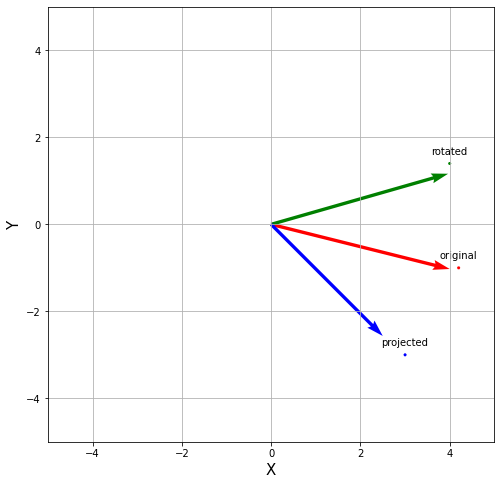

In [86]:
%matplotlib inline
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

x=np.linspace(-10,10,500)
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.xlim([-5,5])
plt.ylim([-5,5])
origin = np.array([0, 0]) # origin point
q1 = plt.quiver(*origin, v[0], v[1], color=['r'], scale=10)
q2 = plt.quiver(*origin, rotated[0], rotated[1], color=['g'], scale=10)
q3 = plt.quiver(*origin, projected[0], projected[1], color=['b'], scale=10)
plt.quiverkey(q1, 4.2, -1, 0.0000003, 'original', coordinates='data')
plt.quiverkey(q2, 4, 1.4, 0.0000001, 'rotated', coordinates='data')
plt.quiverkey(q3, 3, -3, 0.0000001, 'projected', coordinates='data')
plt.grid()

### d. 

In [7]:
print("Norm of original vector: "+ str(np.linalg.norm(v)))
print("Norm of rotated vector: "+ str(np.linalg.norm(rotated)))
print("Norm of projected vector: "+ str(np.linalg.norm(projected)))

Norm of original vector: 4.123105625617661
Norm of rotated vector: 4.123105625617661
Norm of projected vector: 3.5355339059327373


We see that norms of v and rotated vector are similar whereas projected vector has a lower norm.

### e.

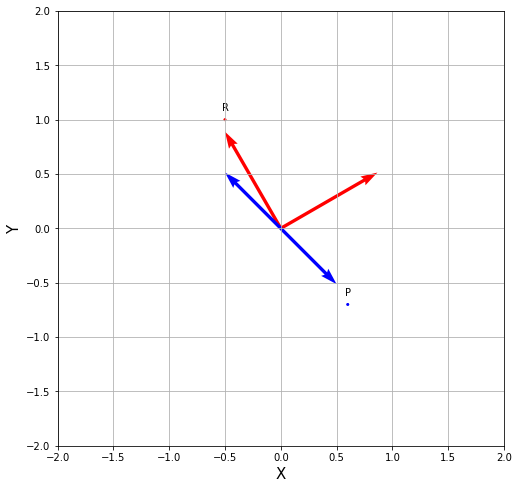

In [90]:
%matplotlib inline
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

x=np.linspace(-10,10,500)
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.xlim([-2,2])
plt.ylim([-2,2])
origin = np.array([0, 0]) # origin point
q1 = plt.quiver(*origin, R[0][0], R[1][0], color=['r'], scale=4)
q2 = plt.quiver(*origin, R[0][1], R[1][1], color=['r'], scale=4)
q3 = plt.quiver(*origin, P[0][0], P[1][0], color=['b'], scale=4)
q4 = plt.quiver(*origin, P[0][1], P[1][1], color=['b'], scale=4)
plt.quiverkey(q1, -0.5, 1, 0.0000003, 'R', coordinates='data')
plt.quiverkey(q4, 0.6, -0.7, 0.0000003, 'P', coordinates='data')
plt.grid()

First, let me explain why rotated and original vector norms must be same.  
We know that 
$$ r = R.v $$
if r is the rotated version of v for some specific theta.
Then, 
$$ r = \sum_{}^{} c^{(i)}.v_{i} $$

where $c^{(i)}$ is the ith column of R and $v_{i}$ is the ith index of v.

$$||r||^2 =  ||\sum_{}^{} c^{(i)}.v_{i}||^2  =  \sum_{}^{} ||c^{(i)}||^2.(v_{i})^2 $$

Adding that this equation holds if the all columns are orthogonal to each other, which holds in our case. See that columns of R has norm 1, by the following trigonometric identity,  
$$ \sin^2(\theta) + \cos^2(\theta) = 1 $$  
So actually, R has orthonormal columns.  

$$||r||^2 =  ||\sum_{}^{} c^{(i)}.v_{i}||^2  =  \sum_{}^{} ||c^{(i)}||^2.(v_{i})^2 $$   
$$||r||^2  =  \sum_{}^{} (v_{i})^2 = ||v||^2 $$

Now we can explain the behavior of P.  
$$ P = \frac{1}{2}.\begin{bmatrix}
1 + \cos (2\theta) & \sin (2\theta) \\
\sin (2\theta) & 1 - \cos (2\theta)
\end{bmatrix} $$ 

See that columns of P must be linearly dependent since  
$$(1 + \cos{(2\theta)}).(1 - \cos{(2\theta)}) = {\sin{(2\theta})}^2 $$  
$$\det{P} = 0$$

So the columns of matrix P can be seen as 

$$ P = \begin{bmatrix}
c_1 & k.c_1 
\end{bmatrix} $$ 

where $c_1$ is the first column of $P$ and $k=\frac{\sin{(2\theta)}}{1+\cos{(2\theta)}}$

Then, 
$$p=P.v= \begin{bmatrix} v_1.c_1+k.v_2.c_1 \end{bmatrix} = (v_1+k.v_2).c_1 $$  
where $v_1$ and $v_2$ are indices of $v$.

$$ ||p||^2 = (v_1+k.v_2)^2.||c_1||^2 $$ 

Thus, norm of p has no clear correlation with norm v since the angle $\theta$ determines k and $c_1$.

## Problem 2

In [17]:
v = np.random.normal(0, 1, 5)
v

array([-0.98524609,  0.23991596, -1.14647037,  0.20305621,  1.01048051])

### a.

Now we should define a matrix S such that it sorts v in ascending order. To do that, S should consist of 5 rows where each has only one 1 and remaining 0's. The indices for ones should provide the correct permutation for correct sorting. 

In [22]:
order = [3,1,4,2,5]
S = np.zeros((5,5))
for i in range(5):
    S[i][order[i]-1]=1
    
S

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [23]:
v

array([-0.98524609,  0.23991596, -1.14647037,  0.20305621,  1.01048051])

In [27]:
vs = S@v
vs

array([-1.14647037, -0.98524609,  0.20305621,  0.23991596,  1.01048051])

### b.

We are now defining matrix K to reverse a vector. If we fill the matrix with ones in reverse diagonal, the ones in each row will bring the reverse order element to the result matrix.

In [28]:
K = np.zeros((5,5))
for i in range(5):
    K[i][4-i]=1

K    

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [29]:
vk = K@vs
vk

array([ 1.01048051,  0.23991596,  0.20305621, -0.98524609, -1.14647037])

### c.

In [30]:
vz = S@(K@v)
vz

array([-1.14647037,  1.01048051,  0.23991596,  0.20305621, -0.98524609])

$v_{z}$ and $v_{k}$ are different because the S matrix can only sort the vectors in the given specific order. The sorting operation can not be generic because that requires additional data to keep in matrix.

### d.

In [41]:
S2 = []
for i in range(5):
    S2.append(K@S[:,i])
S2 = np.array(S2)
S2=S2.T
S2

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

See that this is actually multiplying S by K.

In [44]:
S2 = K@S
S2

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [42]:
vh = S2@v
vh

array([ 1.01048051,  0.23991596,  0.20305621, -0.98524609, -1.14647037])

$v_{h}$ and $v_{k}$ are now same because by reversing the columns of S, we converted it to a sorting matrix for descending order, which is basically same thing with sorting in ascending order and reversing as in the case of $v_{k}$.

### e.

To sum up,  
$$v_{s} = S.v $$
$$v_{k} = K.(S.v) $$
$$v_{z} = S.K.v $$
$$v_{h} = (K.S).v $$


From $v_{z}$ differing from others, we see that matrix multiplication is not commutative. From $v_{k}=v_{h}$, we see that matrix multiplication is associative.

## Problem 3  
### a.

In [7]:
v = [1,-4,3,7,0,-3]

T = np.zeros((4,6))
for i in range(4):
        T[i][i]=0.1
        T[i][i+1]=0.3
        T[i][i+2]=0.6
v2=T@v



In [8]:
T

array([[0.1, 0.3, 0.6, 0. , 0. , 0. ],
       [0. , 0.1, 0.3, 0.6, 0. , 0. ],
       [0. , 0. , 0.1, 0.3, 0.6, 0. ],
       [0. , 0. , 0. , 0.1, 0.3, 0.6]])

In [9]:
v2

array([ 0.7,  4.7,  2.4, -1.1])

### b.  

Yes T corresponds to a linear function.  
Let $f:\mathbb{R}^{6}\dashrightarrow \mathbb{R}^{4}$ be a function defined as:  
$$ f(x) = T.x $$
Then ,
$$ f(\alpha.x + \beta.y) = T(\alpha.x + \beta.y) $$
$$ f(\alpha.x + \beta.y) = \alpha.T.x + \beta.T.y) $$
$$ f(\alpha.x + \beta.y) = \alpha.f(x) + \beta.f(y) $$
where $\alpha, \beta \in \mathbb{R}$ and $x,y \in \mathbb{R}^{6}$  
Thus $f$ is a linear function.

### c.

We know that 

$$T.v=\hat{v}$$  

We need to find $\hat{T}$ such that 

$$\hat{T}.\hat{v}=v$$

Plugging $\hat{v}$ in,  

$$\hat{T}.T.v =v$$

Then $\hat{T}$ should be at least left inverse of $T$. But this is not possible since $T$ is a 4 x 6 matrix. Columns of T can not be independent, $T$ is not left invertible. Thus there is no general $\hat{T}$ such that $\hat{T}.\hat{v}=v$.  

Why did I say general?  

Because we can design a specific matrix to satisfy $\hat{T}.\hat{v}=v$.  

We know  

$$ \hat{v}= \begin{bmatrix}
0.5 \\ 4.7 \\
2.4 \\ -1.1
\end{bmatrix} $$  
 So when we can design $\hat{T}$ such that its first column is $2.v$ and the rest is zero, it will bring the needed result by column interpretation. But this is not a generic approach. I believe in this question you are asking for a $\hat{T}$ that minimizes 
 
$$ || \hat{T}.T - I || $$

### d.

Think of $\hat{T}$ as a collection of 4 vectors in 6d space. By combining those vectors with coefficients of $\hat{v}$, we can span a 4d subspace. After combination, we want to reach v which is a vector in 6d space. We can only reach correct v if v lies on the 4d subspace in the span of vectors in $\hat{T}$. This represents an overdetermined system which has more constraints then the number of variables.

### e.  

If we were given $\hat{T}$ and $v$ and asked to find the best fitting $\hat{v}$, we would apply the following least squares procedure:  

* We would find the pseudo-inverse(left inverse in this case) of $\hat{T}$
* Multiply the left inverse with $v$ to get $\hat{v}$.  

$$ \hat{T} . \hat{v} \approx v $$  

$$ \hat{v} =  (\hat{T}^{T}.\hat{T})^{-1}.\hat{T}^{T}.v $$  

$$ \hat{T} . (\hat{T}^{T}.\hat{T})^{-1}.\hat{T}^{T}.v \approx v $$  

Now unfortunately, we are asked the matrix instead of the vector. Thus we need to approximate $\hat{T}$ with given $\hat{v}$. I am going to try to build a similar equation to the upper one. Let $\hat{T}$ be the right inverse of T.

$$ \hat{T} = T^{T}.(T.T^T)^{-1}$$

$$ \hat{T}.\hat{v} \approx v $$

$$ T^{T}.(T.T^T)^{-1}.\hat{v} \approx v$$

$$ T^{T}.(T.T^T)^{-1}.T.v \approx v$$  

See that this seems like a least squares solution. It actually is! The least squares solution for 

$$T^{T}. \hat{v} = v $$ 

would be this. In other words,  

$$ T^T(T.T^T)^{-1}.T \approx I $$  

This outcome validates my approach that the least squares solution for $\hat{T}$ is,  

$$ \hat{T} = T^{T}.(T.T^T)^{-1} $$  

$$ \hat{T} . T \approx I $$

The approximation result:  

In [10]:
def right_inverse(M):
    return  M.T@(np.linalg.inv(M@M.T))
T2 = right_inverse(T)
v3 = T2@v2
v3

array([-0.40754414, -0.07972939,  1.27445538,  7.20939387,  0.18289383,
       -3.1263459 ])

### f. 

As in part e, $\hat{T}$ is right inverse of $T$. 

## Problem 4  
## a.

For invertible A and B, A+B may or may not be invertible.  

**Proof:**  

* A+B may not be invertible. Suppose A and B are invertible matrices and $A = -B$. Then $A+B = 0$ matrix which is not invertible since its columns are linearly dependent trivially.  

* A+B may be invertible. Suppose $A = B = I$. Then $A+B = 2.I$ is also invertible trivially.  

Therefore, without any further assumption, we can not comment on the invertability on A+B.

### b. 

For invertible A and B, $  R = \begin{bmatrix}
A & 0 \\
0 & B
\end{bmatrix} $ is also invertible.  
**Proof:**  

Let K be the block matrix such that,  
$$ K = \begin{bmatrix}
A^{-1} & 0 \\
0 & B^{-1}
\end{bmatrix} $$


Since both $K$ and $R$ are 2n x 2n matrices and $A$, $A^{-1}$, $B$, $B^{-1}$ are n x n matrices,  

$$ K.R = \begin{bmatrix}
A^{-1}.A & 0 \\
0 & B^{-1}.B
\end{bmatrix}
=\begin{bmatrix}
I & 0 \\
0 & I
\end{bmatrix} = I $$

Then $K=R^{-1}$, thus R is invertible. 

### c.

For invertible A and B, $  R = \begin{bmatrix}
A & 0 \\
A+B & B
\end{bmatrix} $ is also invertible.  
**Proof:**  

Let K be the block matrix such that,  
$$ K = \begin{bmatrix}
A^{-1} & 0 \\
-(A^{-1}+B^{-1}) & B^{-1}
\end{bmatrix} $$

Since both $K$ and $R$ are 2n x 2n matrices and $A$, $A^{-1}$, $B$, $B^{-1}$ are n x n matrices,  

$$ K.R = \begin{bmatrix}
A^{-1}.A & 0 \\
(A+B).A^{-1} + B.(-(A^{-1}+B^{-1})) & B^{-1}.B
\end{bmatrix}
=\begin{bmatrix}
I & 0 \\
0 & I
\end{bmatrix} = I $$

Then $K=R^{-1}$, thus R is invertible. 

### d.  
For invertible A and B, A.B.A is also invertible.

**Proof:**  

Let M and K be n x n matrices such that,  

$$ M = A.B.A $$
$$ K = A^{-1}.B^{-1}.A^{-1} $$
$$ K.M = (A^{-1}.B^{-1}.A^{-1}).(A.B.A)$$

With associativity,  
$$ K.M = (A^{-1}.B^{-1}).(A^{-1}.A).(B.A)$$
$$ K.M = (A^{-1}.B^{-1}).I.(B.A)$$
$$ K.M = (A^{-1}.(B^{-1}.B).A)$$
$$ K.M = (A^{-1}.I.A) = I$$

Then $K=M^{-1}$, thus A.B.A is invertible. 

## Problem 5

### a.

In [32]:
x = np.linspace(-1,1,20)
x

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

### b.

In [34]:
y = np.sin(2*np.pi*x / (1.5))
e = np.random.normal(0,0.1,20)
print(y+e)
print(y)

[ 0.87925642  0.45622619  0.25868054 -0.52862971 -0.76980855 -0.99107094
 -0.90190126 -0.78361022 -0.59888733 -0.17661721  0.30092166  0.60040725
  0.91434764  0.90448032  0.66664868  0.75500115  0.15649801 -0.0387523
 -0.50289849 -1.02275701]
[ 0.8660254   0.56980806  0.16459459 -0.27210346 -0.65675202 -0.91577333
 -0.99962031 -0.89225424 -0.61421271 -0.21868109  0.21868109  0.61421271
  0.89225424  0.99962031  0.91577333  0.65675202  0.27210346 -0.16459459
 -0.56980806 -0.8660254 ]


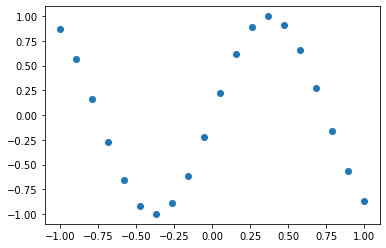

In [35]:
plt.scatter(x,y)

### c.

In [36]:
V = [[x[i]**j for j in range(11)] for i in range(len(x))]

### d.

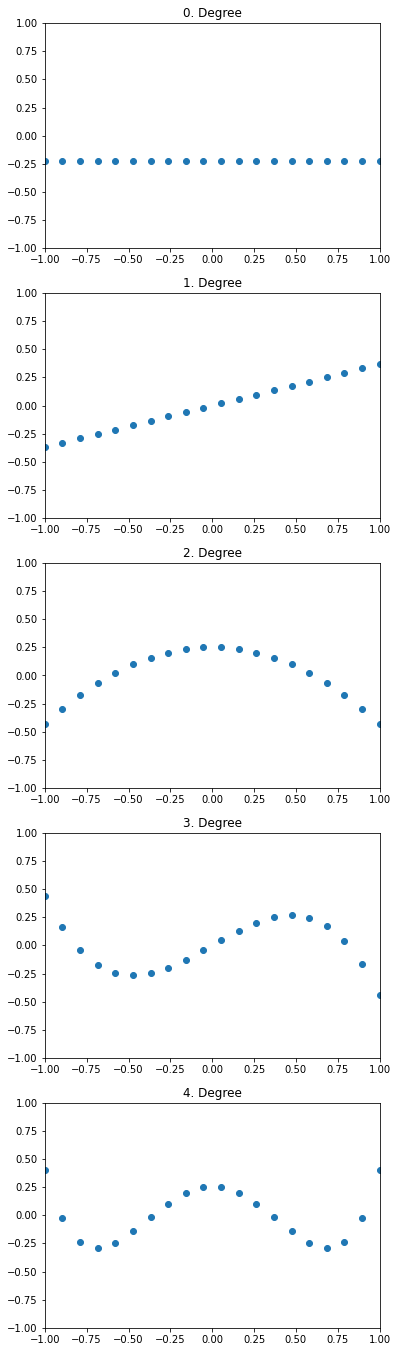

In [42]:
Q, R = np.linalg.qr(V)

f, axs = plt.subplots(5,1,sharex=False, sharey=False,figsize = (6,24))
for i in range(5):
    ytemp = Q[:,i]
    axs[i].set_title(str(i)+". Degree")
    axs[i].set_xlim([-1.0, 1.0])
    axs[i].set_ylim([-1.0, 1.0])
    axs[i].scatter(x,ytemp)

## e.

Solving least squares for $Q.c^{(j)}$ actually means solving least squares for the j+1 columns of $Q$.  
Note that all slices of Q also consist of orthonormal columns (spanning a smaller subspace).  
Thus, if a slice of $Q$ is $M$, the least squares coefficients can simply be found with $M^T.y$.  

For j = 0,

In [38]:
Q1 = Q[:,0:1]
theta1 = Q1.T @ y
y1 = Q1 @ theta1

Q6 = Q[:,0:6]
theta6 = Q6.T @ y
y6 = Q6 @ theta6

Q11 = Q[:,0:11]
theta11 = Q11.T @ y
y11 = Q11 @ theta11

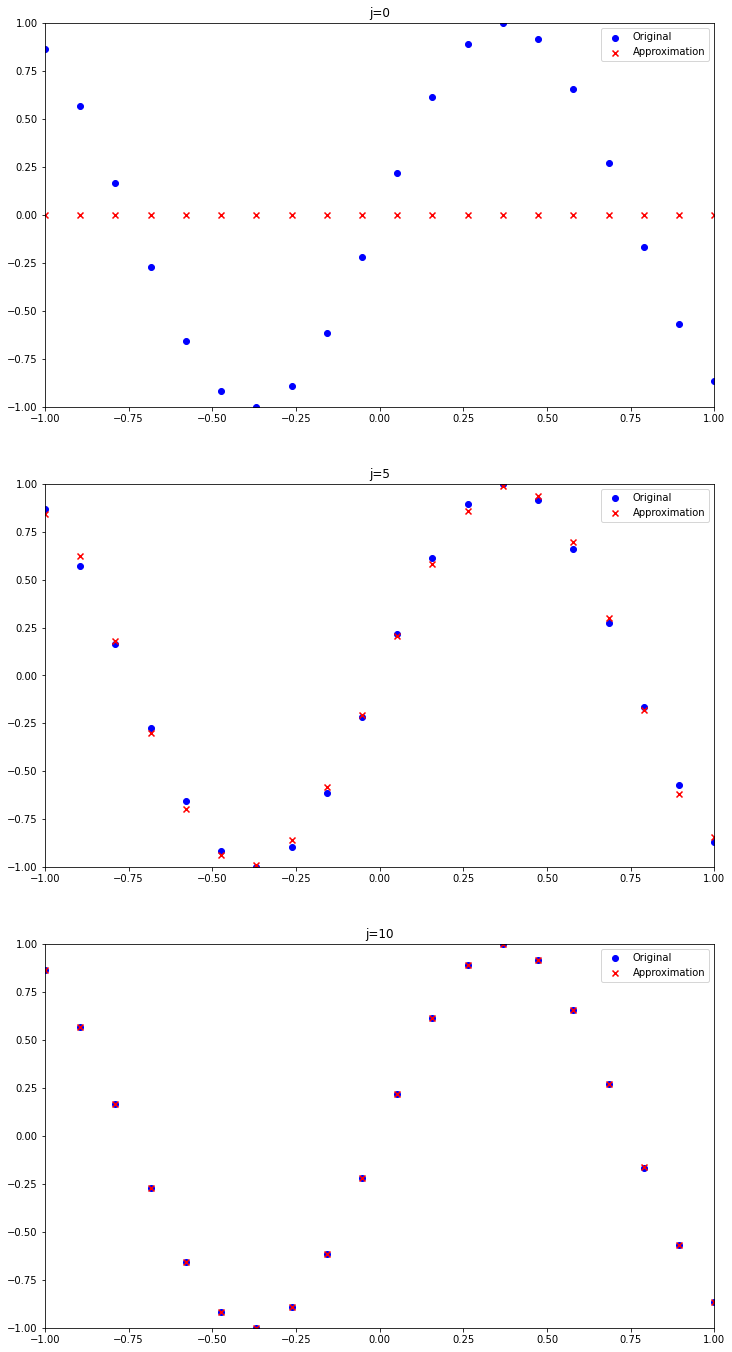

In [39]:
f, axs = plt.subplots(3,1,sharex=False, sharey=False,figsize = (12,24))

axs[0].set_title("j=0")
axs[0].set_xlim([-1.0, 1.0])
axs[0].set_ylim([-1.0, 1.0])
l1=axs[0].scatter(x,y,color='b')
l2=axs[0].scatter(x,y1,color='r',marker='x')
l1.set_label("Original")
l2.set_label("Approximation")
axs[0].legend()

axs[1].set_title("j=5")
axs[1].set_xlim([-1.0, 1.0])
axs[1].set_ylim([-1.0, 1.0])
l1=axs[1].scatter(x,y,color='b')
l2=axs[1].scatter(x,y6,color='r',marker='x')
l1.set_label("Original")
l2.set_label("Approximation")
axs[1].legend()

axs[2].set_title("j=10")
axs[2].set_xlim([-1.0, 1.0])
axs[2].set_ylim([-1.0, 1.0])
l1=axs[2].scatter(x,y,color='b')
l2=axs[2].scatter(x,y11,color='r',marker='x')
l1.set_label("Original")
l2.set_label("Approximation")
axs[2].legend()


Expectedly, as j increases, approximations became more accurate. Because j, as the number of columns to use brings more terms to our approximation. When j is low, our system is so much over-determined to replicate the detailed behavior of sine function.

### f.

Now instead of using Q, we are going to use our original V with same procedure. Since V is not orthonormal, we are going to need the left inverse of V to get coefficients.

In [40]:
def left_inverse(M):
    return  (np.linalg.inv(M.T@M))@M.T 
V = np.array(V)

V1 = V[:,0:1]
theta1 = left_inverse(V1) @ y
y1 = V1 @ theta1

V6 = V[:,0:6]
theta6 = left_inverse(V6) @ y
y6 = V6 @ theta6

V11 = V[:,0:11]
theta11 = left_inverse(V11) @ y
y11 = V11 @ theta11

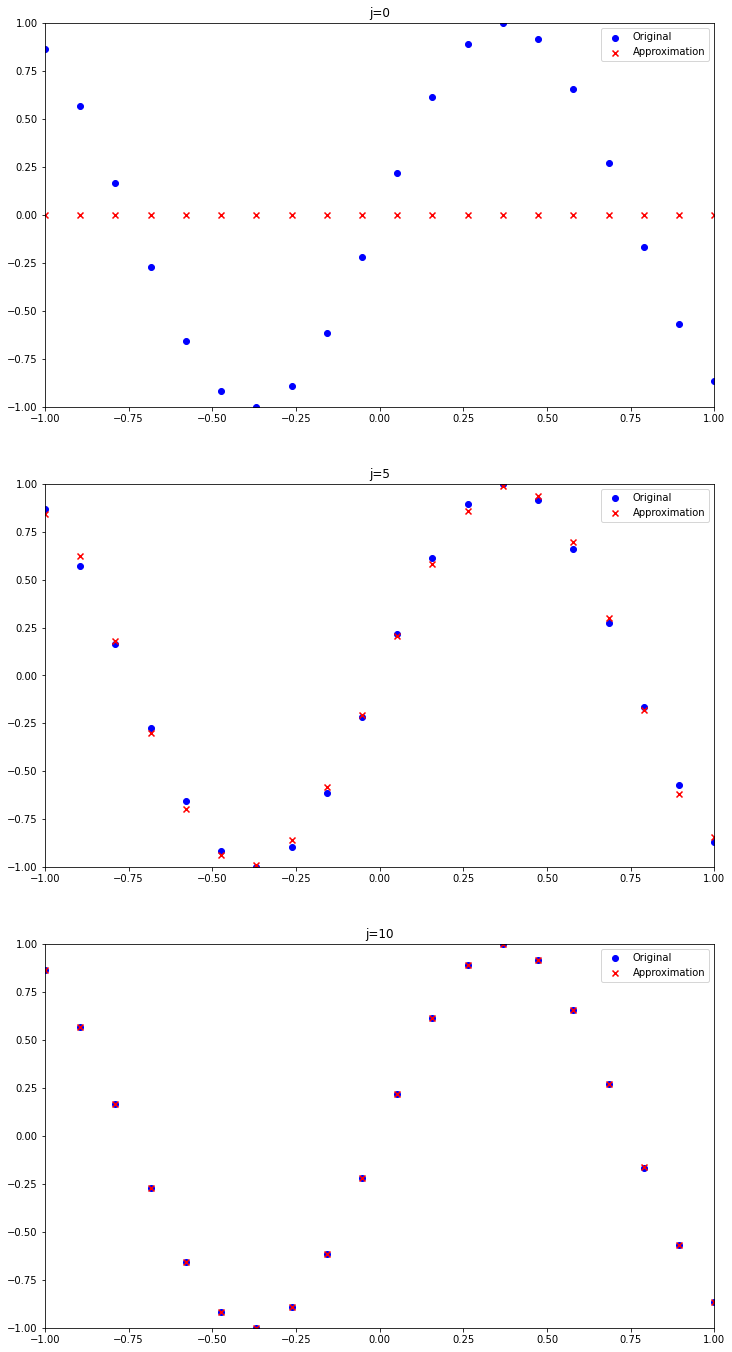

In [41]:
f, axs = plt.subplots(3,1,sharex=False, sharey=False,figsize = (12,24))

axs[0].set_title("j=0")
axs[0].set_xlim([-1.0, 1.0])
axs[0].set_ylim([-1.0, 1.0])
l1=axs[0].scatter(x,y,color='b')
l2=axs[0].scatter(x,y1,color='r',marker='x')
l1.set_label("Original")
l2.set_label("Approximation")
axs[0].legend()

axs[1].set_title("j=5")
axs[1].set_xlim([-1.0, 1.0])
axs[1].set_ylim([-1.0, 1.0])
l1=axs[1].scatter(x,y,color='b')
l2=axs[1].scatter(x,y6,color='r',marker='x')
l1.set_label("Original")
l2.set_label("Approximation")
axs[1].legend()

axs[2].set_title("j=10")
axs[2].set_xlim([-1.0, 1.0])
axs[2].set_ylim([-1.0, 1.0])
l1=axs[2].scatter(x,y,color='b')
l2=axs[2].scatter(x,y11,color='r',marker='x')
l1.set_label("Original")
l2.set_label("Approximation")
axs[2].legend()

Approximation accuracies were similar in e and f. This is because V and Q span the same subspace. The only difference is that the columns of Q are orthonormal, thus it yields more reasonable $\theta$ coefficients.